In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [26]:
df = df = pd.read_csv('Healthcare_Risk.csv')

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

In [28]:
print(df.head(10))

    Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0  46.0    Male          Diabetes   137.04          135.27  28.90   
1  22.0    Male           Healthy    71.58          113.27  26.29   
2  50.0     NaN            Asthma    95.24             NaN  22.53   
3  57.0     NaN           Obesity      NaN          130.53  38.47   
4  66.0  Female      Hypertension    95.15          178.17  31.12   
5  50.0    Male      Hypertension   107.00          171.80  25.33   
6  80.0    Male      Hypertension      NaN          174.52  29.87   
7  50.0    Male            Cancer      NaN          136.13  26.37   
8  60.0  Female           Obesity      NaN             NaN  35.49   
9  13.0  Female            Asthma    90.60          126.88  29.24   

   Oxygen Saturation  LengthOfStay  Cholesterol  Triglycerides  HbA1c  \
0              96.04             6       231.88         210.56   7.61   
1              97.54             2       165.57         129.41   4.91   
2              90.31 

In [29]:
print(df.isnull().sum())

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64


In [30]:
df = df.drop(['random_notes','noise_col'],axis=1)
df = df.dropna(subset = ['Medical Condition','Age','Gender'])

In [31]:
index = ['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level']

df[index] = df[index].where(df[index] >= 0, 0)
df['Glucose'] = df['Glucose'].fillna(df.groupby('Medical Condition')['Glucose'].transform('mean'))
df['Blood Pressure'] = df['Blood Pressure'].fillna(df.groupby('Medical Condition')['Blood Pressure'].transform('mean'))
df=df[((df['Glucose'] > 0) & (df['Blood Pressure'] > 0)) & df['Sleep Hours'] > 0]


In [32]:
df['penyakit'] = np.where(
    df['Medical Condition'].str.lower() == 'healthy', 'Negatif','Positif'
)

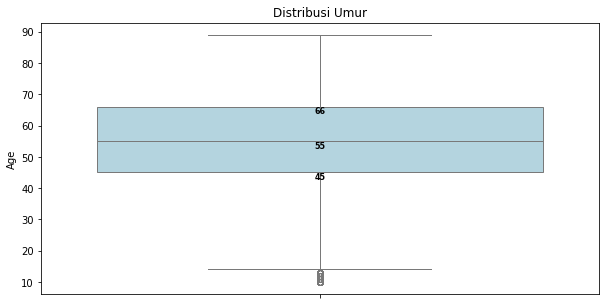

In [33]:
plt.figure(figsize = (10,5))
sns.boxplot(y = df['Age'],color = 'lightblue')
plt.title('Distribusi Umur')
plt.ylabel('Age')
plt.tight_layout

iqr = df['Age'].quantile(0.75) -  df['Age'].quantile(0.25)
lower_whisker =  df['Age'].quantile(0.25) - 1.5 * iqr
higher_whisker = df['Age'].quantile(0.75) + 1.5 * iqr


stats = df['Age'].describe()
plt.text(0,stats['50%'], f"{stats['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
plt.text(0,stats['75%'], f"{stats['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
plt.text(0,stats['25%'], f"{stats['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')

plt.show()

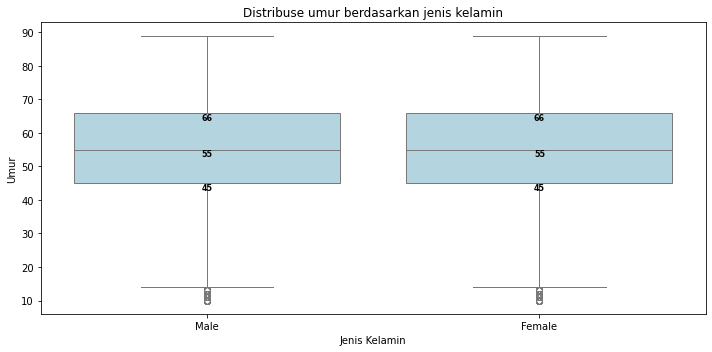

In [34]:
plt.figure(figsize = (10,5))
ax = sns.boxplot(data = df, x='Gender', y='Age', color = 'lightblue')
plt.title("Distribuse umur berdasarkan jenis kelamin")
plt.xlabel('Jenis Kelamin')
plt.ylabel('Umur')
plt.tight_layout()

stats = df.groupby('Gender')['Age'].describe()
stats_boxplot = [t.get_text() for t in ax.get_xticklabels()]

for i, gender in enumerate(stats_boxplot):
    s = stats.loc[gender]
    plt.text(i,s['50%'],f"{s['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['25%'],f"{s['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['75%'],f"{s['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')


plt.show()
    

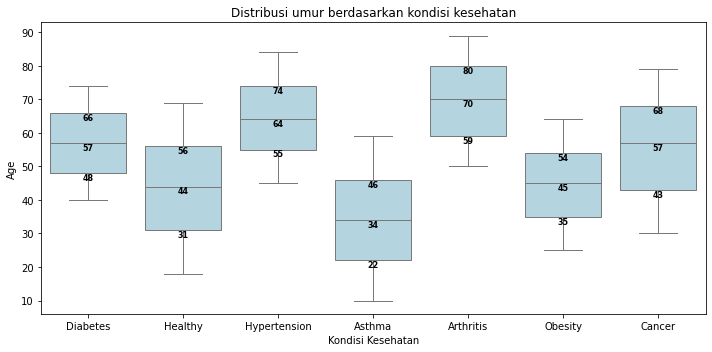

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x='Medical Condition', y= 'Age', color = 'lightblue')
plt.title("Distribusi umur berdasarkan kondisi kesehatan")
plt.xlabel("Kondisi Kesehatan")
plt.ylabel("Age")
plt.tight_layout()

stats = df.groupby('Medical Condition')['Age'].describe()
stats_boxplot = [t.get_text() for t in plt.gca().get_xticklabels()]

for i, kondisi in enumerate(stats_boxplot):
    s = stats.loc[kondisi]
    plt.text(i,s['50%'],f"{s['50%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['25%'],f"{s['25%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')
    plt.text(i,s['75%'],f"{s['75%']:.0f}",ha = 'center' ,va ='top', fontsize = 8, color = 'black', fontweight = 'bold')


plt.show()

Medical Condition   Arthritis       Asthma      Cancer     Diabetes  \
count              921.000000  1061.000000  610.000000  3396.000000   
mean                 3.437568     4.045240   12.968852     5.537102   
std                  1.118355     1.407469    3.756201     1.713356   
min                  2.000000     2.000000    7.000000     3.000000   
25%                  2.000000     3.000000   10.000000     4.000000   
50%                  3.000000     4.000000   13.000000     6.000000   
75%                  4.000000     5.000000   16.000000     7.000000   
max                  5.000000     6.000000   19.000000     8.000000   

Medical Condition      Healthy  Hypertension      Obesity  
count              1602.000000   3748.000000  2017.000000  
mean                  1.490012      4.012273     3.509668  
std                   0.500056      1.418682     1.112265  
min                   1.000000      2.000000     2.000000  
25%                   1.000000      3.000000     3.000000  


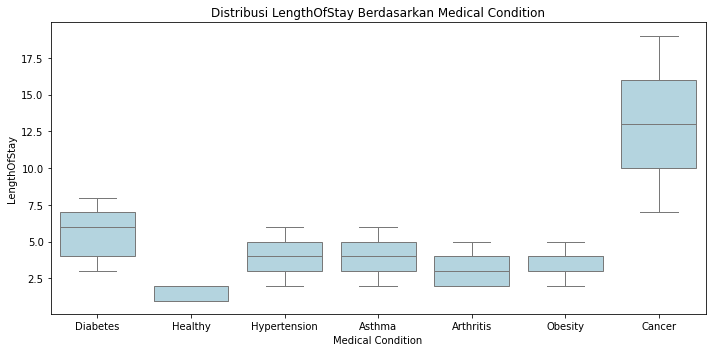

In [36]:
summary = df.groupby('Medical Condition')['LengthOfStay'].describe().T
print(summary)
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x="Medical Condition", y='LengthOfStay', color = "lightblue" )
plt.title("Distribusi LengthOfStay Berdasarkan Medical Condition")
plt.ylabel("LengthOfStay")
plt.xlabel("Medical Condition")
plt.tight_layout()
plt.show()


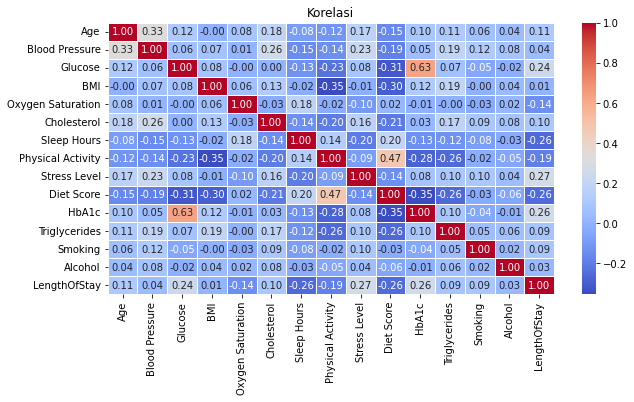

In [37]:
matrix = df[['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level','Diet Score','HbA1c','Triglycerides','Smoking','Alcohol','LengthOfStay']].copy()
matrix = matrix.corr()

plt.figure(figsize = (10,5))
sns.heatmap(matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi')
plt.show()


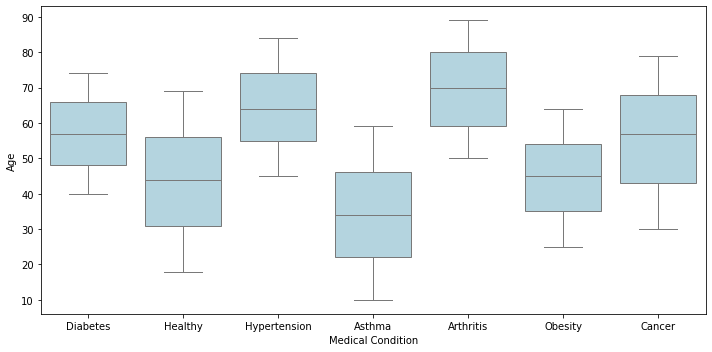

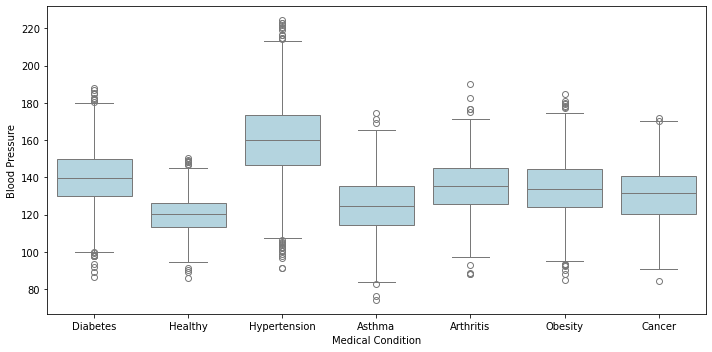

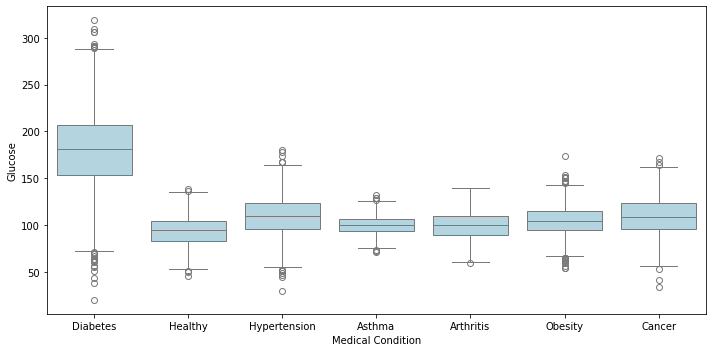

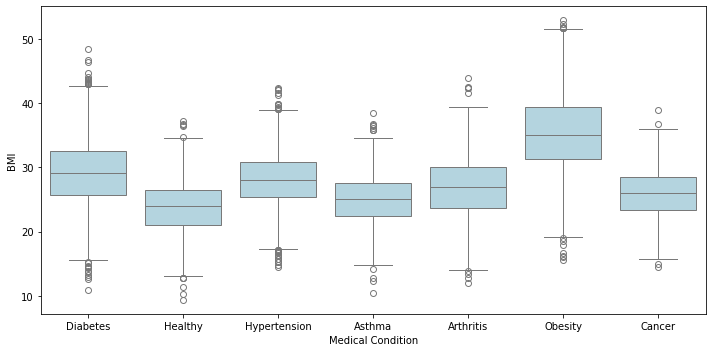

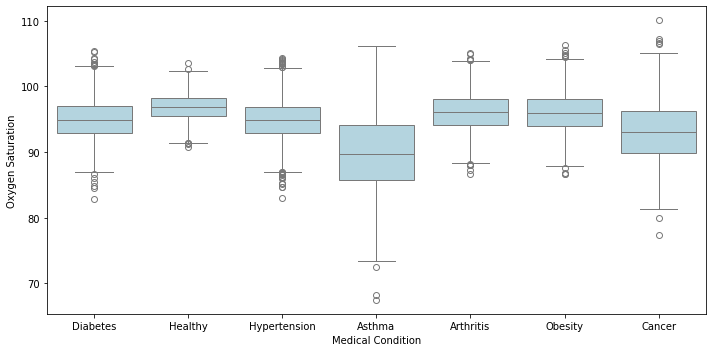

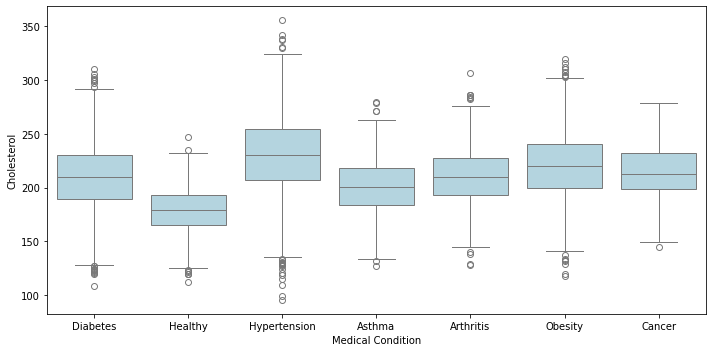

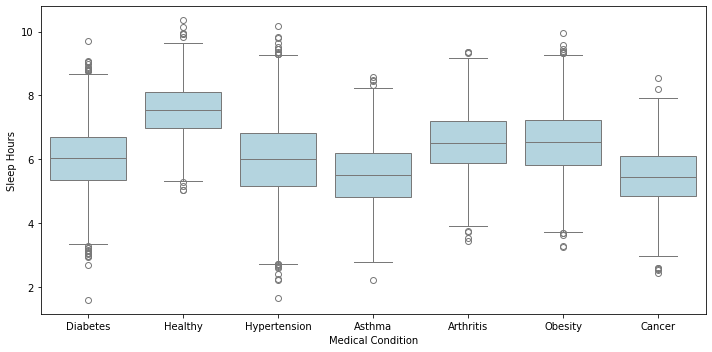

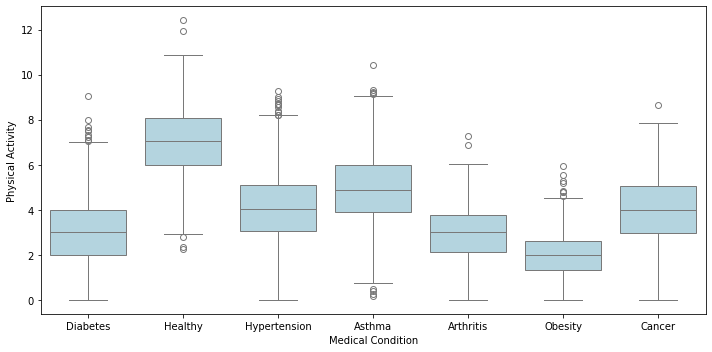

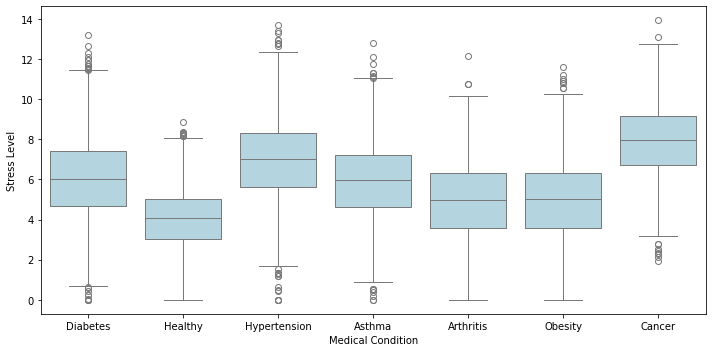

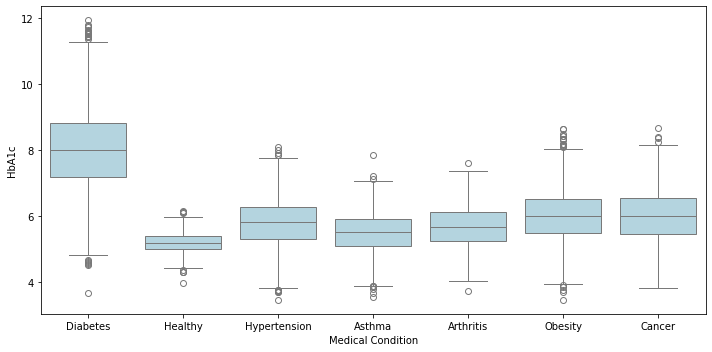

In [38]:
index = ['Age','Blood Pressure','Glucose','BMI','Oxygen Saturation','Cholesterol','Sleep Hours','Physical Activity','Stress Level',"HbA1c"]

for i in index:
    
    plt.figure(figsize = (10,5))
    sns.boxplot(data=df, x='Medical Condition', y=i, color='lightblue')
    plt.xlabel('Medical Condition')
    plt.ylabel(i)
    plt.tight_layout()
    plt.show()

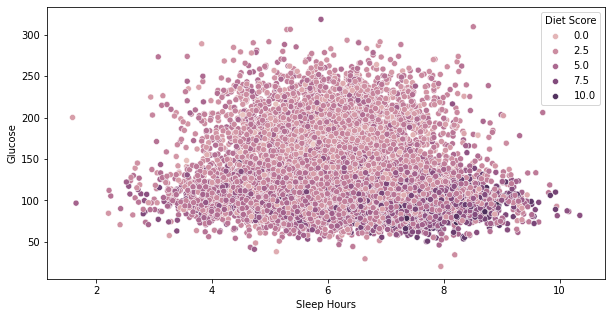

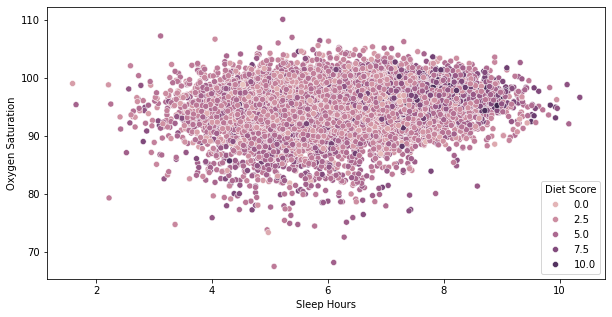

In [39]:
index = ['Glucose','Oxygen Saturation']

for i in index:
    plt.figure(figsize = (10,5))
    sns.scatterplot(data=df, x='Sleep Hours', y=i, hue= 'Diet Score')
    plt.xlabel('Sleep Hours')
    plt.ylabel(i)
    plt.show()


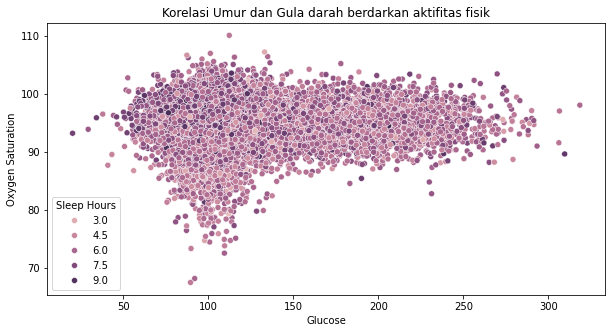

In [40]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df, x='Glucose', y='Oxygen Saturation', hue= 'Sleep Hours')
plt.xlabel('Glucose')
plt.ylabel('Oxygen Saturation')
plt.title('Korelasi Umur dan Gula darah berdarkan aktifitas fisik')
plt.show()

Medical Condition
Arthritis        921
Asthma          1061
Cancer           610
Diabetes        3396
Healthy         1602
Hypertension    3748
Obesity         2017
dtype: int64


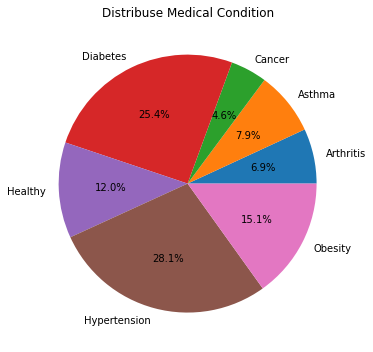

In [41]:
top_penyakit = df.groupby("Medical Condition").size()
print(top_penyakit)

plt.figure(figsize = (10,5))
top_penyakit.plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Distribuse Medical Condition")
plt.tight_layout()
plt.show()

C:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


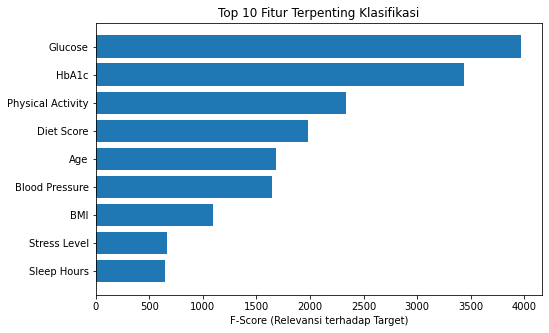

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder

var_kategorik = df.select_dtypes(include = ['object']).columns.tolist()
label_encoder = {}

for cols in var_kategorik:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols].astype(str))
    label_encoder[cols] = le



x_klaf = df.drop(['Medical Condition','LengthOfStay'], axis = 1)
y_klaf = df['Medical Condition']

selector = SelectKBest(score_func = f_classif,k=10)
x_new = selector.fit_transform(x_klaf,y_klaf)

selected_features = x_klaf.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

feature_importance = pd.DataFrame({'Feature': selected_features, 'Score': feature_scores})
feature_importance = feature_importance.sort_values(by='Score', ascending=False)

# Visualisasi
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'], feature_importance['Score'])
plt.gca().invert_yaxis()
plt.title("Top 10 Fitur Terpenting Klasifikasi")
plt.xlabel("F-Score (Relevansi terhadap Target)")
plt.show()

Accuracy: 0.8764507675028079

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       175
           1       0.88      0.89      0.88       221
           2       0.76      0.20      0.32       124
           3       0.97      0.93      0.95       710
           4       1.00      1.00      1.00       282
           5       0.81      0.93      0.86       746
           6       0.86      0.91      0.88       413

    accuracy                           0.88      2671
   macro avg       0.85      0.78      0.79      2671
weighted avg       0.88      0.88      0.87      2671



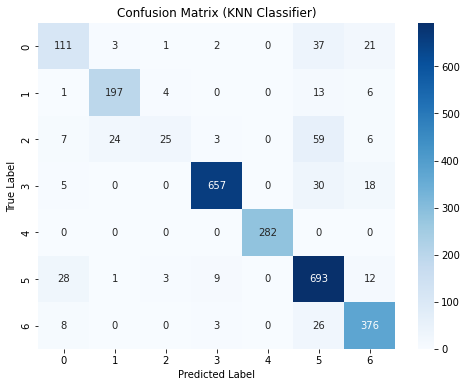

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


x_train_klaf,x_test_klaf,y_train_klaf,y_test_klaf = train_test_split(x_klaf,y_klaf,test_size = 0.2, random_state = 42)

skala = StandardScaler()
x_klaf_skala = skala.fit_transform(x_train_klaf)
x_test_skala = skala.transform(x_test_klaf)

knn = KNeighborsClassifier(n_neighbors = 28,metric = 'manhattan', weights='distance')
knn.fit(x_klaf_skala , y_train_klaf)

y_pred = knn.predict(x_test_skala)

print("Accuracy:", accuracy_score(y_test_klaf, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test_klaf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_klaf, y_pred))



cm = confusion_matrix(y_test_klaf, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_klaf.unique()),
            yticklabels=sorted(y_klaf.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (KNN Classifier)")
plt.show()


In [44]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_neighbors': randint(1, 40),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_dist, n_iter=20, cv=5, random_state=42)
rand_search.fit(x_train_klaf, y_train_klaf)

print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Best Score: 0.792773393342552


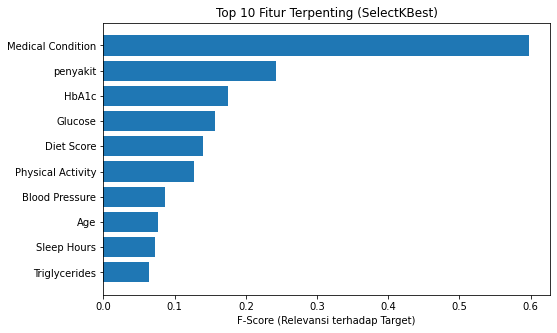

In [45]:
x_regres = df.drop(['LengthOfStay'], axis = 1)
y_regres = df['LengthOfStay']

selector_regres = SelectKBest(score_func= mutual_info_regression, k=10)
x_new_regres= selector_regres.fit_transform(x_regres,y_regres)

selected_features_regres = x_regres.columns[selector_regres.get_support()]
feature_scores_regres = selector_regres.scores_[selector_regres.get_support()]

feature_importance_regres = pd.DataFrame({'Feature': selected_features_regres, 'Score': feature_scores_regres})
feature_importance_regres = feature_importance_regres.sort_values(by='Score', ascending=False)

# Visualisasi
plt.figure(figsize=(8,5))
plt.barh(feature_importance_regres['Feature'], feature_importance_regres['Score'])
plt.gca().invert_yaxis()
plt.title("Top 10 Fitur Terpenting (SelectKBest)")
plt.xlabel("F-Score (Relevansi terhadap Target)")
plt.show()


=== Random Forest Regressor ===
MAE  : 1.275
RMSE : 1.600
R²   : 0.673
MSE  : 2.561


C:\Users\hi\AppData\Local\Temp\ipykernel_23116\2834236326.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = score_evaluasi, y = evaluasi_name, palette = "viridis")


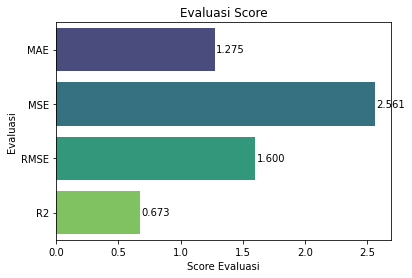

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    x_regres, y_regres, test_size=0.2, random_state=42
)

#lin_reg = LinearRegression()
#lin_reg.fit(X_train,y_train )
#y_pred_lin = lin_reg.predict(X_test)

#mae_lin = mean_absolute_error(y_test, y_pred_lin)
#mse_lin = mean_squared_error(y_test, y_pred_lin)
#rmse_lin = np.sqrt(mse_lin)
#r2_lin = r2_score(y_test, y_pred_lin)

#print("=== Linear Regression ===")
#print(f"MAE  : {mae_lin:.3f}")
#print(f"RMSE : {rmse_lin:.3f}")
#print(f"R²   : {r2_lin:.3f}")
#print(f"MSE  : {mse_lin:.3f}")


rf_reg = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None, 
    random_state=42
)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf,)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Random Forest Regressor ===")
print(f"MAE  : {mae_rf:.3f}")
print(f"RMSE : {rmse_rf:.3f}")
print(f"R²   : {r2_rf:.3f}")
print(f"MSE  : {mse_rf:.3f}")

evaluasi_name = ["MAE","MSE","RMSE","R2"]
score_evaluasi = [mae_rf,mse_rf,rmse_rf,r2_rf]

sns.barplot(x = score_evaluasi, y = evaluasi_name, palette = "viridis")
plt.title("Evaluasi Score")
plt.xlabel("Score Evaluasi")
plt.ylabel("Evaluasi")


for i, v in enumerate(score_evaluasi):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center', fontsize=10)
    
plt.show()